In [1]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
import math

/tmp/ipykernel_91849/4045787516.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  latency_before_dict = torch.load(latency_path_file)
/tmp/ipykernel_91849/4045787516.py:3

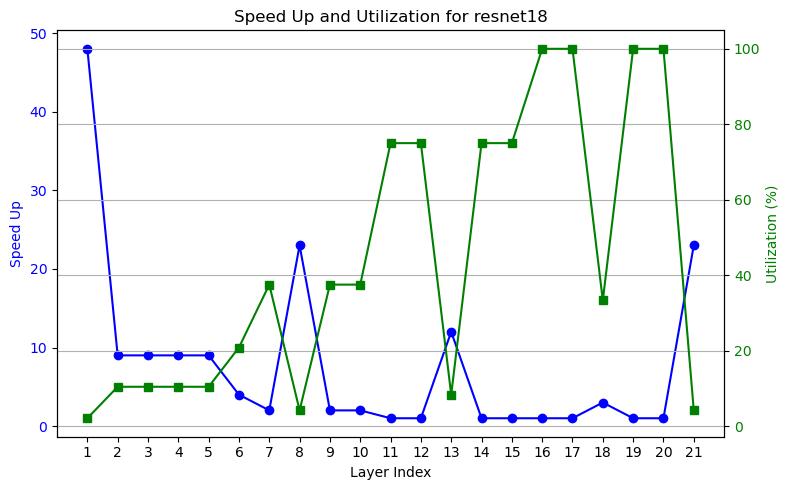

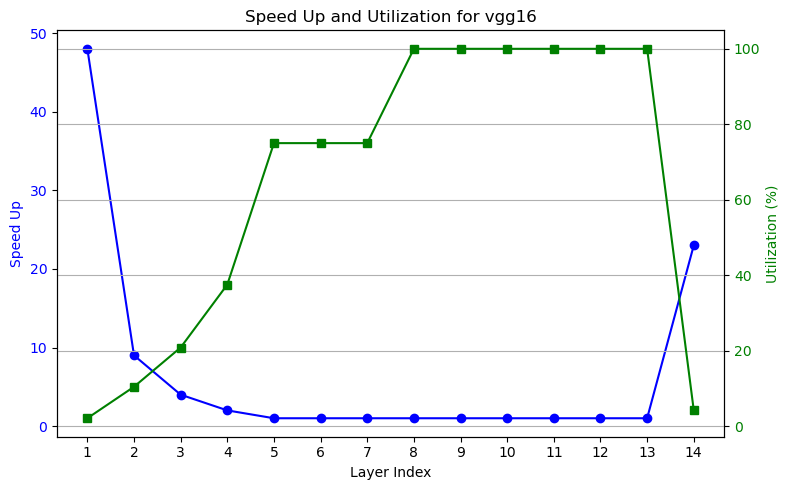

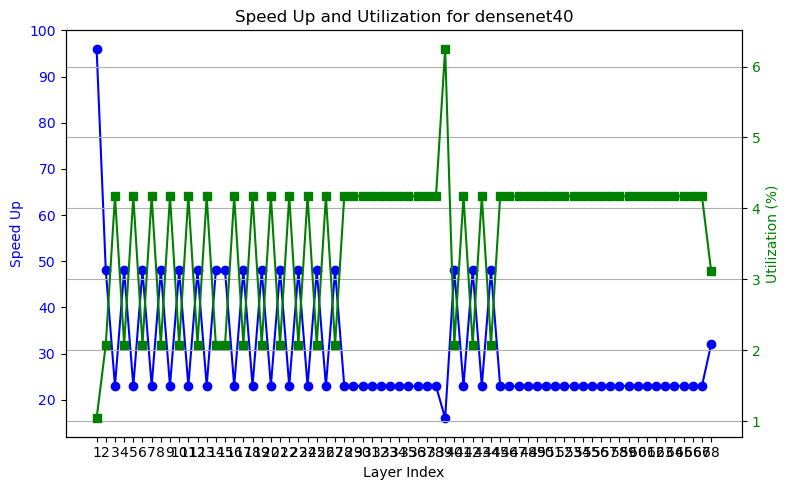

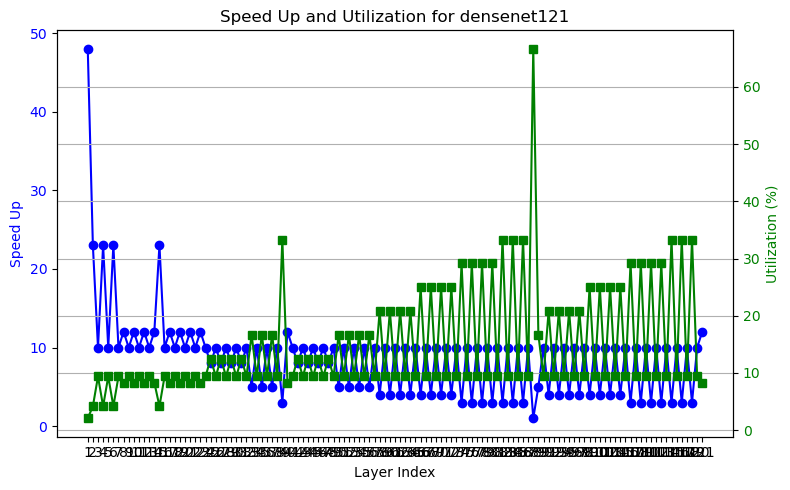

In [7]:
import torch
import math
import matplotlib.pyplot as plt

# Initialize paths
path_to_tile = "../trace_data/"
crossbar_path = "."
latency_path = "./latency_8"

# Initialize model names
model_names = ["resnet18", "vgg16", "densenet40", "densenet121"]

# Dictionaries to store utilization and speed-up values
utilization = {}
speed_up = {}
latency_before = {}
latency_after = {}

for model_name in model_names:
    utilization[model_name] = []
    speed_up[model_name] = []
    # latency_before[model_name] = []
    latency_after[model_name] = []
    
    # Load data
    model_tile_path = path_to_tile + f"tile_info_{model_name}_cifar10.pt"
    crossbar_path = f"no_crossbar_layer_{model_name}_cifar10.pt"
    latency_path_file = f"{latency_path}/latency_{model_name}_8.pt"
    ##this is a dictionary with key as layer index and value as latency
    ##covert to list 
    latency_before_dict = torch.load(latency_path_file)
    latency_before_list = [latency_before_dict[key] for key in latency_before_dict.keys()]
    latency_before[model_name] = latency_before_list
    tile_info = torch.load(model_tile_path)
    crossbar_info = torch.load(crossbar_path)
    
    # Convert crossbar_info dict to list
    crossbar_info_list = [crossbar_info[key] for key in crossbar_info.keys()]
    
    # Define tile size
    tile_size = 96
    
    # Calculate utilization and speed-up
    for i in range(len(tile_info)):
        num_tile_layer = tile_info[i]
        crossbar_layer = crossbar_info_list[i]
        total_crossbars = num_tile_layer * tile_size
        
        # Calculate utilization
        layer_utilization = round(crossbar_layer / total_crossbars * 100, 2)
        utilization[model_name].append(layer_utilization)
        
        # Calculate speed-up
        speed_up_achievable = math.floor(100 / layer_utilization)
        speed_up[model_name].append(speed_up_achievable)
        latency_after[model_name].append(latency_before_list[i] / speed_up_achievable)
        

# Plot results for each model
# Plot results for each model
for model_name in model_names:
    x = range(1, len(speed_up[model_name]) + 1)

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot Speed Up on the first y-axis
    ax1.plot(x, speed_up[model_name], marker='o', label='Speed Up', color='blue')
    ax1.set_xlabel('Layer Index')
    ax1.set_ylabel('Speed Up', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(x)

    # Create a second y-axis
    ax2 = ax1.twinx()
    ax2.plot(x, utilization[model_name], marker='s', label='Utilization', color='green')
    ax2.set_ylabel('Utilization (%)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.set_xticks(x)

    # Add title and grid
    plt.title(f'Speed Up and Utilization for {model_name}')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


Latency before
{'resnet18': [637357.0, 3340650.0, 3340650.0, 3340650.0, 3340650.0, 1492770.0, 1423680.0, 366137.0, 1423680.0, 1423680.0, 641921.0, 473756.0, 181228.0, 473756.0, 473756.0, 118910.0, 53321.0, 69172.0, 53321.0, 53321.0, 1408.28], 'vgg16': [636300.0, 3334910.0, 1298580.0, 1421170.0, 470962.0, 472567.0, 472835.0, 52700.1, 53056.8, 53116.2, 53056.8, 53056.8, 53116.2, 1401.54], 'densenet40': [733136.0, 1625520.0, 2938630.0, 1643640.0, 2938630.0, 1661760.0, 2938630.0, 1679880.0, 2938630.0, 1698000.0, 2938630.0, 1716120.0, 2938630.0, 1737660.0, 415439.0, 639969.0, 419969.0, 639969.0, 424499.0, 639969.0, 429029.0, 639969.0, 433559.0, 639969.0, 438089.0, 639969.0, 442619.0, 639969.0, 772445.0, 639969.0, 776974.0, 639969.0, 781504.0, 639969.0, 786034.0, 639969.0, 790564.0, 639969.0, 1521590.0, 108388.0, 117545.0, 109521.0, 117545.0, 110653.0, 117545.0, 193110.0, 117545.0, 194242.0, 117545.0, 195375.0, 117545.0, 196507.0, 117545.0, 197640.0, 117545.0, 198772.0, 117545.0, 199905.0, 1

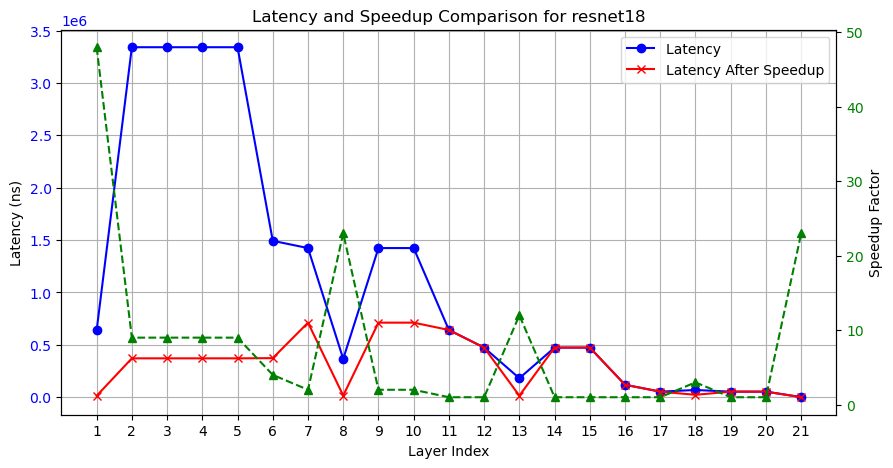

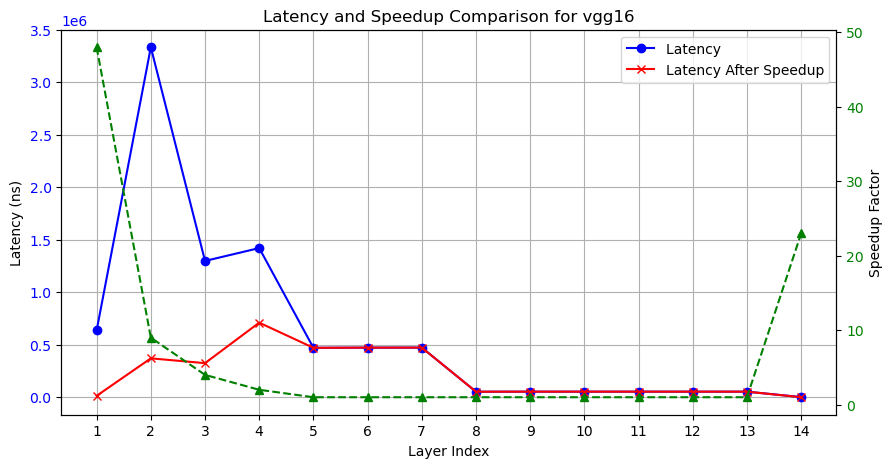

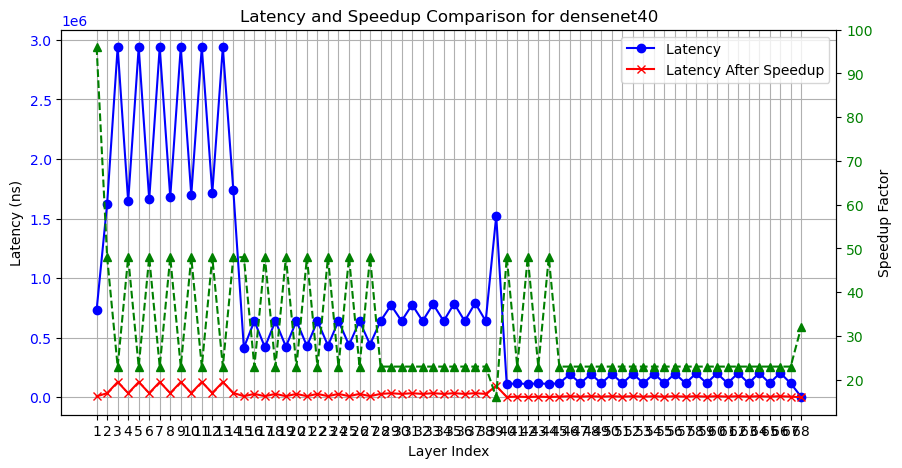

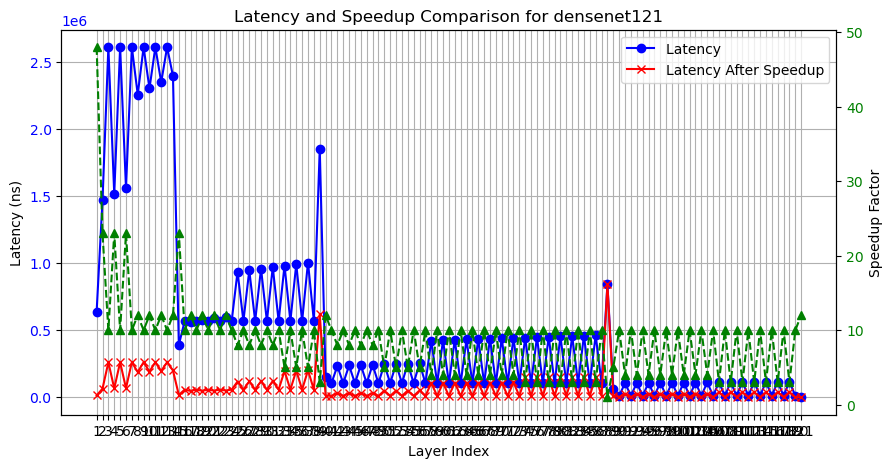

In [ ]:
print("Latency before")
print(latency_before)
print("Latency after")
print(latency_after)

import matplotlib.pyplot as plt

# Define the plot function for each model
def plot_latency_and_speedup(model_name, latency_before, latency_after, speedup_factor):
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plotting latency on the primary y-axis
    iterations = range(1, len(speed_up[model_name]) + 1)
    ax1.plot(iterations, latency_before[model_name], label='Latency ', marker='o', color='blue')
    ax1.plot(iterations, latency_after[model_name], label='Latency After Speedup', marker='x', color='red')
    ax1.set_xlabel('Layer Index')
    ax1.set_ylabel('Latency (ns)')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(iterations)  # Ensures x-axis ticks are integer values
    ax1.legend(loc='upper right')
    ax1.grid(True)

    # Creating a second y-axis for speedup factor
    ax2 = ax1.twinx()
    ax2.plot(iterations, speedup_factor[model_name], label='Speedup Factor', marker='^', linestyle='--', color='green')
    ax2.set_ylabel('Speedup Factor')
    ax2.tick_params(axis='y', labelcolor='green')
    # ax2.legend(loc='upper right')

    
    # ax2.set_xticks(iterations)  # Ensures x-axis ticks are integer values

    plt.title(f'Latency and Speedup Comparison for {model_name}')
    plt.show()


# # Example dictionaries (assuming they are filled with the actual data)
# latency_before = {
#     'resnet18': [data_points],  # Replace [data_points] with actual data
#     'vgg16': [data_points],
#     'densenet40': [data_points],
#     'densenet121': [data_points]
# }

# latency_after = {
#     'resnet18': [data_points],  # Replace [data_points] with actual data
#     'vgg16': [data_points],
#     'densenet40': [data_points],
#     'densenet121': [data_points]
# }

# Plot for each model
plot_latency_and_speedup('resnet18', latency_before, latency_after,speed_up)
plot_latency_and_speedup('vgg16', latency_before, latency_after,speed_up)
plot_latency_and_speedup('densenet40', latency_before, latency_after,speed_up)
plot_latency_and_speedup('densenet121', latency_before, latency_after,speed_up)



In [1]:
my_list = ['apple', 'banana', 'cherry']
variable = 'banana'

if variable in my_list:
    print("The variable is in the list!")


The variable is in the list!
